In [54]:
import pandas as pd
import numpy as np
import seaborn as sb

pd.set_option('display.max_columns', None)

df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
df.shape

(5580035, 24)

In [55]:
null_cols = df.columns[df.isnull().any()]
df[null_cols].isnull().sum()

CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1472786
CMPLNT_TO_TM         1468882
OFNS_DESC              18892
PD_CD                   4909
PD_DESC                 4909
CRM_ATPT_CPTD_CD           7
BORO_NM                  463
ADDR_PCT_CD              390
LOC_OF_OCCUR_DESC    1223392
PREM_TYP_DESC          35198
PARKS_NM             5567497
HADEVELOPT           5302218
X_COORD_CD            195868
Y_COORD_CD            195868
Latitude              195868
Longitude             195868
Lat_Lon               195868
dtype: int64

In [56]:
to_drop = ['CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'PARKS_NM', 'HADEVELOPT']
df.drop(to_drop, axis=1, inplace=True)

In [57]:
manhattan = df[df['BORO_NM'] == 'MANHATTAN']
manhattan['LOC_OF_OCCUR_DESC'] = manhattan['LOC_OF_OCCUR_DESC'].fillna('NA')
manhattan = manhattan.dropna(axis=0, how='any')
print manhattan.shape
manhattan.head()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1273279, 20)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
2,569369778,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NA,OTHER,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
4,641637920,12/31/2015,23:25:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
6,608231454,12/31/2015,23:15:00,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,7.0,OPPOSITE OF,STREET,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
9,415095955,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,19.0,INSIDE,DRUG STORE,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"
11,178090167,12/31/2015,23:00:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,INSIDE,RESTAURANT/DINER,988113.0,206263.0,40.732828,-73.986063,"(40.732828332, -73.986062857)"


In [58]:
manhattan.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [59]:

manhattan['CMPLNT_FR_YEAR'] = manhattan['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[2]))
manhattan['CMPLNT_FR_MONTH'] = manhattan['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
manhattan['CMPLNT_FR_DAY'] = manhattan['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
manhattan['CMPLNT_FR_HOUR'] = manhattan['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))
manhattan.drop('CMPLNT_FR_DT', axis=1, inplace=True)
# the data is only valid from year 2006 yo 2016, so here ignore any previous data
manhattan = manhattan[manhattan['CMPLNT_FR_YEAR'] > 2005]

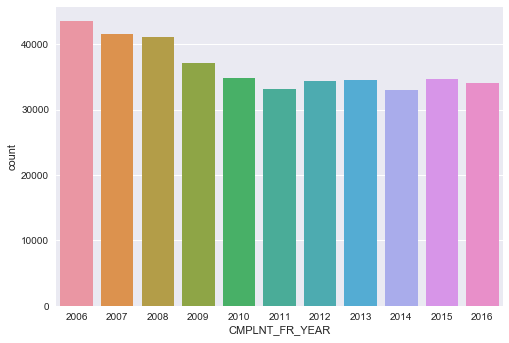

In [60]:
# explore number of felony incidents in Manhattan as relationship of year
felony = manhattan[manhattan['LAW_CAT_CD'] == 'FELONY']
sb.countplot(x='CMPLNT_FR_YEAR', data=felony)

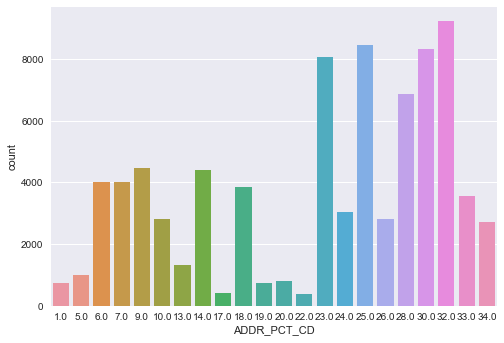

In [61]:
# explore drug related compliants among different percincts
sb.countplot(x='ADDR_PCT_CD', data=manhattan[manhattan['OFNS_DESC'] == 'DANGEROUS DRUGS'])